# Análise explorátoria com planilhas de vendas

In [28]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [4]:
#juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [5]:
# visualizando uma amostra do banco de dados
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
108,Recife,2019-03-02,152.89,981,4
39,Salvador,2019-01-01,165.95,1036,3
113,Fortaleza,2019-03-02,38.63,980,2
20,Natal,2018-06-08,608.00,852,4
235,Natal,2019-01-03,41.84,1034,1


In [6]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [7]:
#Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [8]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [10]:
#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [11]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [12]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [13]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
23,Fortaleza,2019-01-01,85.90,1004,5,429.50,2019
13,Salvador,2019-02-12,39.29,1035,1,39.29,2019
92,Natal,2019-01-02,4.57,1035,1,4.57,2019
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019
130,Natal,2019-01-02,59.78,1036,1,59.78,2019


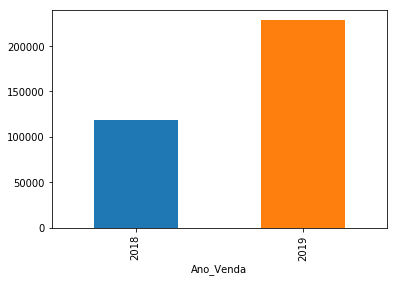

In [16]:
df.groupby(df["Ano_Venda"])["Receita"].sum().plot.bar()

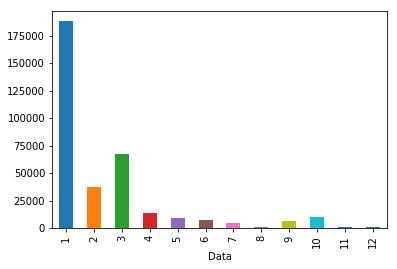

In [17]:
df.groupby(df["Data"].dt.month)["Receita"].sum().plot.bar()

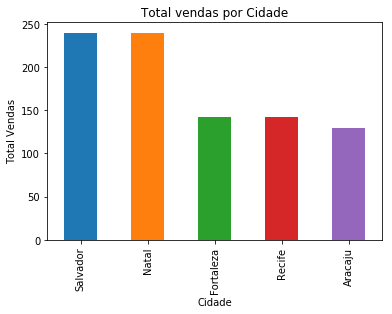

In [29]:
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

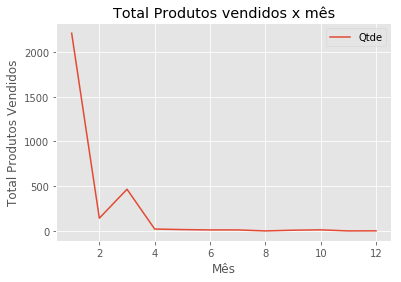

In [30]:
#Alterando o estilo
plt.style.use("ggplot")
df.groupby(df["Data"].dt.month)["Qtde"].sum().plot(title = "Total Produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();